# **Statistical Analysis of education system using Machine learning**

## **Exploratory Data Analysis**

## **Importing the libraries**

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Importing the dataset**

In [46]:
df = pd.DataFrame(pd.read_excel('DATA.xlsx'))
df

,Gender,Age,Pursuing,Stream,Affordable,Connectivity,Instruments,Understanding,Concentration,Preference
0,Female,21,College,Science,Yes,Medium,"Good(mobile , laptop and other)",Medium,Medium,Offline Education
1,Male,22,College,Science,No,High,"Good(mobile , laptop and other)",Low,Low,Offline Education
2,Female,22,College,Science,Yes,Medium,"Good(mobile , laptop and other)",Medium,Medium,Online Education
3,Male,22,College,Science,No,Low,Poor(only mobile),Low,Low,Offline Education
4,Female,22,College,Science,Yes,Medium,"Good(mobile , laptop and other)",Medium,Medium,Offline Education
...,...,...,...,...,...,...,...,...,...,...
445,Male,18,Higher- Secondary School,Science,No,Low,Poor(only mobile),Low,Low,Offline Education
446,Female,17,College,Arts,No,Medium,Poor(only mobile),Medium,Medium,Offline Education
447,Male,22,College,Science,Yes,Medium,"Good(mobile , laptop and other)",Medium,Medium,Offline Education
448,Male,16,College,Science,Yes,Medium,"Good(mobile , laptop and other)",Medium,Medium,Offline Education


In [47]:
df.shape

(450, 10)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         450 non-null    object
 1   Age            450 non-null    int64 
 2   Pursuing       450 non-null    object
 3   Stream         450 non-null    object
 4   Affordable     450 non-null    object
 5   Connectivity   450 non-null    object
 6   Instruments    450 non-null    object
 7   Understanding  450 non-null    object
 8   Concentration  450 non-null    object
 9   Preference     450 non-null    object
dtypes: int64(1), object(9)
memory usage: 35.3+ KB


In [49]:
df.isnull().sum()

,0
Gender,0
Age,0
Pursuing,0
Stream,0
Affordable,0
Connectivity,0
Instruments,0
Understanding,0
Concentration,0
Preference,0


In [50]:
df.describe()

,Age
count,450.000000
mean,19.151111
std,3.362218
min,6.000000
25%,17.000000
50%,19.000000
75%,22.000000
max,32.000000


<Axes: xlabel='Preference', ylabel='count'>

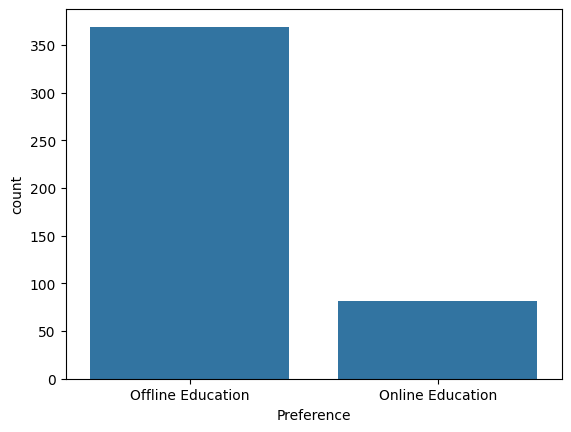

In [51]:
sns.countplot(x="Preference",data = df)


<Axes: xlabel='Preference', ylabel='count'>

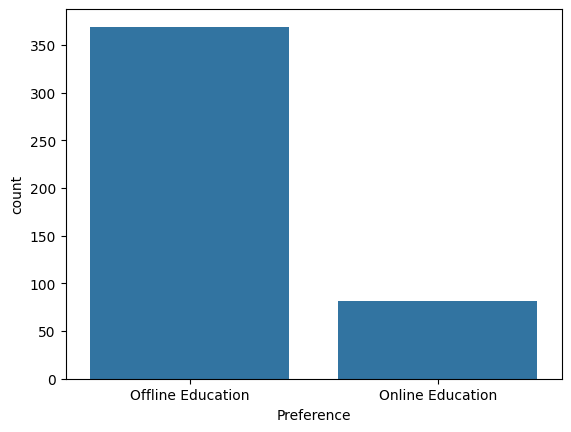

In [52]:
sns.countplot(x='Preference',data=df)

<Axes: xlabel='Gender', ylabel='count'>

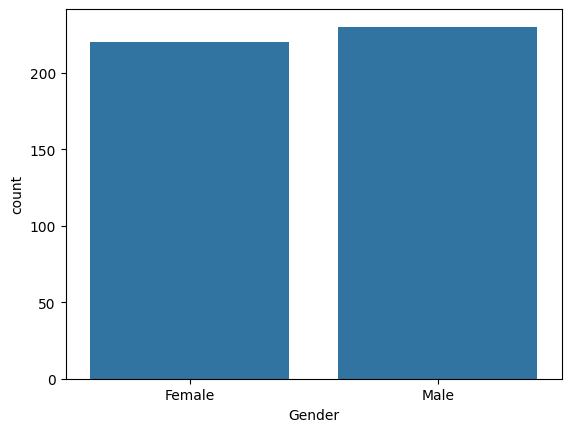

In [53]:
sns.countplot(x="Gender",data = df)

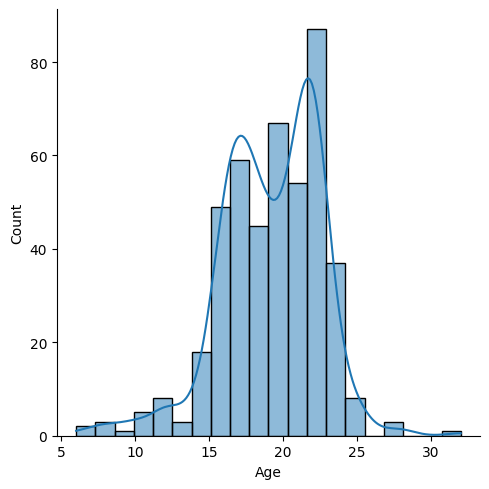

In [54]:
sns.displot(x="Age",kde=True,data=df)

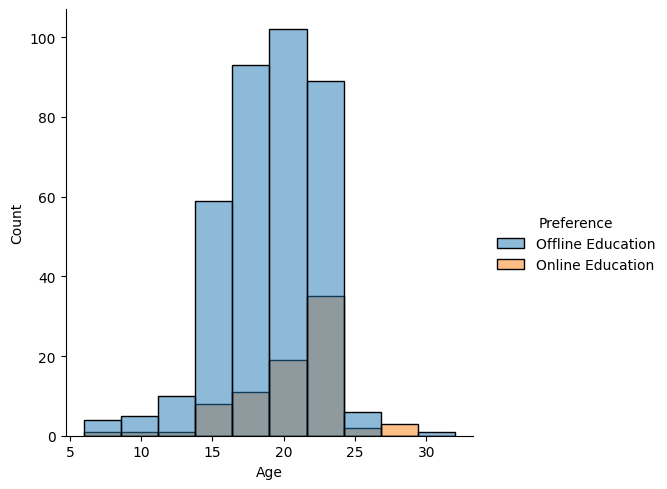

In [55]:
sns.displot(x="Age",hue="Preference",data=df,bins=10)

<Axes: xlabel='Pursuing', ylabel='count'>

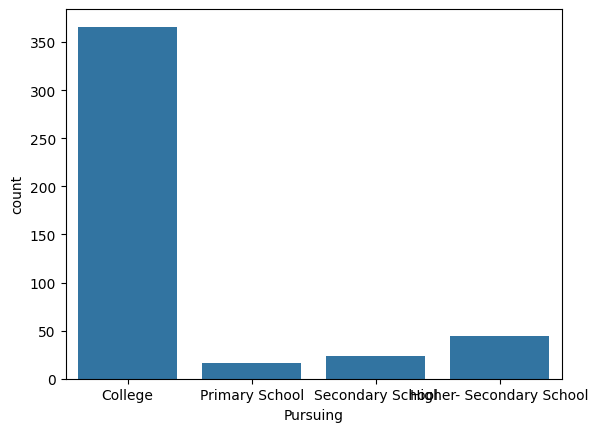

In [56]:
sns.countplot(x="Pursuing",data=df)

<Axes: xlabel='Stream', ylabel='count'>

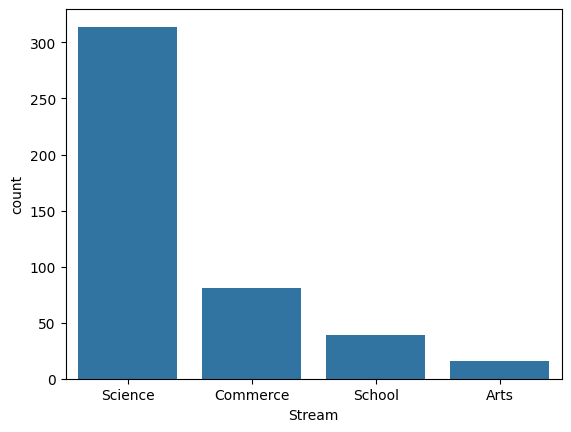

In [57]:
sns.countplot(x="Stream", data=df)

<Axes: xlabel='Affordable', ylabel='count'>

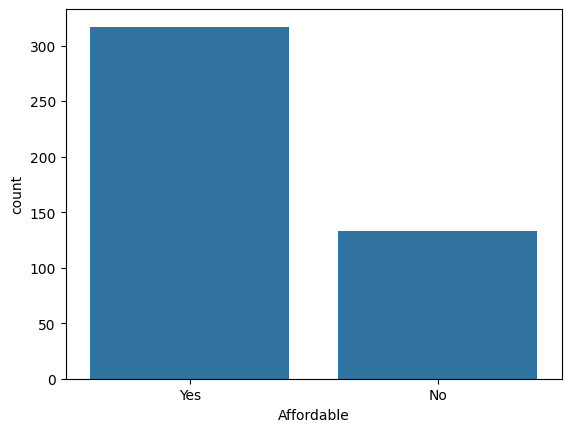

In [58]:
sns.countplot(x="Affordable",data=df)

<Axes: xlabel='Connectivity', ylabel='count'>

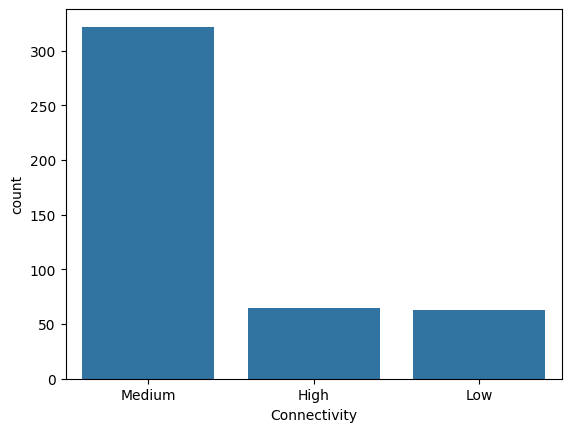

In [59]:
sns.countplot(x="Connectivity",data=df)

<Axes: xlabel='Instruments', ylabel='count'>

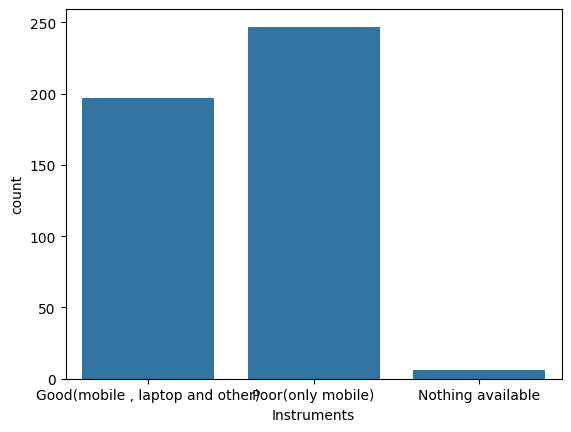

In [60]:
sns.countplot(x="Instruments",data=df)

<Axes: xlabel='Concentration', ylabel='count'>

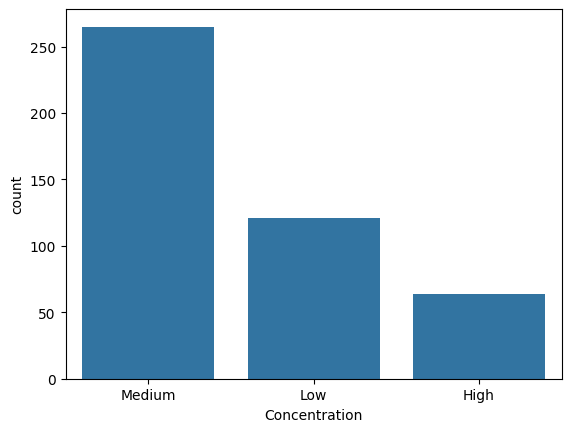

In [61]:
sns.countplot(x="Concentration",data=df)

##**Data preprocessing** (Data Preperation)

In [62]:
nominal_col = df[['Stream']]
ordinal_col = df[['Pursuing','Connectivity','Instruments','Concentration','Understanding','Preference','Gender','Affordable']]
num_col = ['Age']

##**Feature Encoding**

In [63]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df_ohe = ohe.fit_transform(nominal_col)
print(df_ohe.toarray())

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [64]:
df_ohe = pd.DataFrame(df_ohe.toarray())
print(df_ohe)

       0    1    2    3
0    0.0  0.0  0.0  1.0
1    0.0  0.0  0.0  1.0
2    0.0  0.0  0.0  1.0
3    0.0  0.0  0.0  1.0
4    0.0  0.0  0.0  1.0
..   ...  ...  ...  ...
445  0.0  0.0  0.0  1.0
446  1.0  0.0  0.0  0.0
447  0.0  0.0  0.0  1.0
448  0.0  0.0  0.0  1.0
449  1.0  0.0  0.0  0.0

[450 rows x 4 columns]


In [65]:
df = pd.concat([df,df_ohe],axis=1)
df.drop(nominal_col,axis=1,inplace=True)
df.head(5)

,Gender,Age,Pursuing,Affordable,Connectivity,Instruments,Understanding,Concentration,Preference,0,1,2,3
0,Female,21,College,Yes,Medium,"Good(mobile , laptop and other)",Medium,Medium,Offline Education,0.0,0.0,0.0,1.0
1,Male,22,College,No,High,"Good(mobile , laptop and other)",Low,Low,Offline Education,0.0,0.0,0.0,1.0
2,Female,22,College,Yes,Medium,"Good(mobile , laptop and other)",Medium,Medium,Online Education,0.0,0.0,0.0,1.0
3,Male,22,College,No,Low,Poor(only mobile),Low,Low,Offline Education,0.0,0.0,0.0,1.0
4,Female,22,College,Yes,Medium,"Good(mobile , laptop and other)",Medium,Medium,Offline Education,0.0,0.0,0.0,1.0


In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#df_le = le.fit_transform(ordinal_col)
for col in ordinal_col.columns:
  df[col] = le.fit_transform(df[col])

In [67]:
df.head(5)

,Gender,Age,Pursuing,Affordable,Connectivity,Instruments,Understanding,Concentration,Preference,0,1,2,3
0,0,21,0,1,2,0,2,2,0,0.0,0.0,0.0,1.0
1,1,22,0,0,0,0,1,1,0,0.0,0.0,0.0,1.0
2,0,22,0,1,2,0,2,2,1,0.0,0.0,0.0,1.0
3,1,22,0,0,1,2,1,1,0,0.0,0.0,0.0,1.0
4,0,22,0,1,2,0,2,2,0,0.0,0.0,0.0,1.0


## **Feature Scaling**

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['Age']] = sc.fit_transform(df[['Age']])

In [69]:
df.head(5)

,Gender,Age,Pursuing,Affordable,Connectivity,Instruments,Understanding,Concentration,Preference,0,1,2,3
0,0,0.550514,0,1,2,0,2,2,0,0.0,0.0,0.0,1.0
1,1,0.848267,0,0,0,0,1,1,0,0.0,0.0,0.0,1.0
2,0,0.848267,0,1,2,0,2,2,1,0.0,0.0,0.0,1.0
3,1,0.848267,0,0,1,2,1,1,0,0.0,0.0,0.0,1.0
4,0,0.848267,0,1,2,0,2,2,0,0.0,0.0,0.0,1.0


##**Oversampling with SMOTE and random undersample for imbalanced dataset**

<Axes: xlabel='Preference', ylabel='count'>

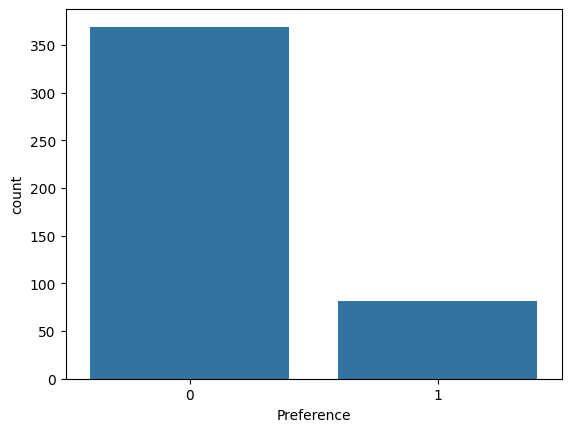

In [70]:
#check the response variable is balanced or not?
sns.countplot(x = df["Preference"])

In [71]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [72]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state = 2)
# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 990})


## **Spliting the data into training set & test set**

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

##**Training the Model**

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors= 5,metric='minkowski',p=2)
dt = DecisionTreeClassifier(criterion = 'entropy')
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy')
nb = GaussianNB()
svc = SVC(kernel = "linear")

#Create a list of classifier:
Classifier = [lr, knn, dt, rfc, nb, svc]

# making predictions on the training set
for clf in Classifier:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(y_train, y_pred))

Accuracy score of  LogisticRegression = 97.36745438961675
Accuracy score of  KNeighborsClassifier = 98.81229337578058
Accuracy score of  DecisionTreeClassifier = 100.0
Accuracy score of  RandomForestClassifier = 99.8285784253704
Accuracy score of  GaussianNB = 97.5143871678707
Accuracy score of  SVC = 97.50214276968286


##**Evaluating the Model**

In [75]:
from sklearn.metrics import accuracy_score
for clf in Classifier:
    #clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy score of ",clf.__class__.__name__,"=",100*accuracy_score(y_test, y_pred))

Accuracy score of  LogisticRegression = 97.31913330885054
Accuracy score of  KNeighborsClassifier = 98.49430774880646
Accuracy score of  DecisionTreeClassifier = 98.45758354755783
Accuracy score of  RandomForestClassifier = 98.56775615130371
Accuracy score of  GaussianNB = 97.50275431509364
Accuracy score of  SVC = 97.42930591259639


**We clearly see that Random Forest model shows the highest accuracy with 98.5% as compared to other models.**


##**ROC curve**

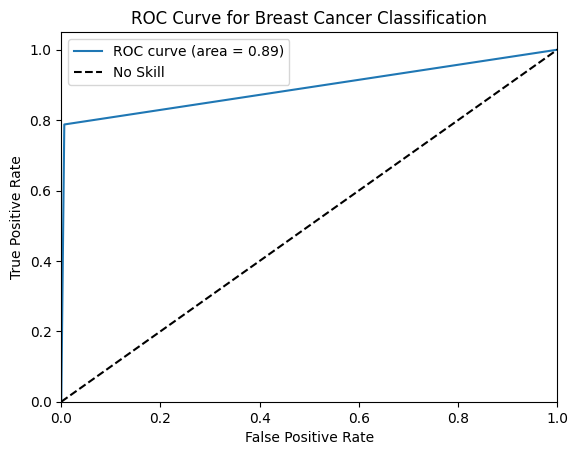

In [79]:
# Calculate ROC curve
from sklearn.metrics import roc_curve, auc # import the roc_curve function
import matplotlib.pyplot as plt # import the matplotlib library
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()


An ideal ROC curve would be as close as possible to the upper left corner of the plot, indicating high TPR (correctly identifying true positives) with low FPR (incorrectly identifying false positives).
The AUC score provides a quantitative measure of the classifier’s performance, with a value of 1 indicating perfect classification.
In our case AUC score is 0.89 and its close to 1 and indicating that the 88% our classification is perfect.
